## HR Analytics: Job Change of Data Scientists
Predict who will move to a new job

Features

- enrollee_id : Unique ID for candidate
- city: City code
- city_ development _index : Developement index of the city (scaled)
- gender: Gender of candidate
- relevent_experience: Relevant experience of candidate
- enrolled_university: Type of University course enrolled if any
- education_level: Education level of candidate
- major_discipline :Education major discipline of candidate
- experience: Candidate total experience in years
- company_size: No of employees in current employer's company
- company_type : Type of current employer
- lastnewjob: Difference in years between previous job and current job
- training_hours: training hours completed
- target: 0 – Not looking for job change, 1 – Looking for a job change


### Step 1. Library Import

In [3]:
import pandas as pd
import numpy as np

In [4]:
ls data

aug_test.csv           aug_train.csv          sample_submission.csv


### Step 2. 데이터불러오기

In [5]:
train_data = pd.read_csv('./data/aug_train.csv')
test_data = pd.read_csv('./data/aug_test.csv')

In [6]:
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [8]:
train_data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [10]:
# 학습데이터에 null 값을 확인합니다
train_data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [11]:
# 테스트 데이터에 null 값을 확인합니다
test_data.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

### Step 3. EDA

In [12]:
train_data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [13]:
list(train_data.columns)

['enrollee_id',
 'city',
 'city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours',
 'target']

In [18]:
# for문 데이터추출 전 test code
train_data[list(train_data.columns)[0]].dtype

dtype('int64')

In [23]:
# category, numeric column 분류
cat_col = []
num_col = []
for col in train_data.columns:
    if train_data[col].dtype == object:
        print('category coloumn : ',col)
        cat_col.append(col)
    else:
        print('numarical column : ',col)
        num_col.append(col)

numarical column :  enrollee_id
category coloumn :  city
numarical column :  city_development_index
category coloumn :  gender
category coloumn :  relevent_experience
category coloumn :  enrolled_university
category coloumn :  education_level
category coloumn :  major_discipline
category coloumn :  experience
category coloumn :  company_size
category coloumn :  company_type
category coloumn :  last_new_job
numarical column :  training_hours
numarical column :  target


In [24]:
# 데이터 확인
cat_col

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [25]:
# 데이터 확인
num_col

['enrollee_id', 'city_development_index', 'training_hours', 'target']

In [26]:
# head 다시 한 번 살펴보기
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [27]:
# 카테고리형 변수들만 살펴봅니다.
train_data[cat_col]

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,city_21,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never
3,city_115,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4
...,...,...,...,...,...,...,...,...,...,...
19153,city_173,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1
19154,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4
19155,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4
19156,city_65,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2


### Step 3-1. EDA - Visualization | Numerical Columns

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

#### Target & 숫자형 컬럼 상관관계 시각화

In [29]:
num_col

['enrollee_id', 'city_development_index', 'training_hours', 'target']

In [82]:
train_data['target'].unique()

array([1., 0.])

#### target은 0 혹은 1로 구성.

In [106]:
# 숫자형 컬럼이 각각 target에 미치는 영향 확인
train_data.corr()

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


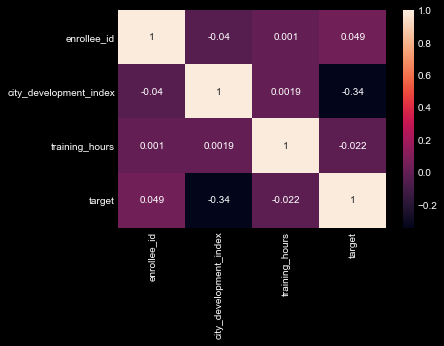

In [118]:
sns.heatmap(train_data.corr(), annot=True);

In [109]:
train_data.corr()['target']

enrollee_id               0.049475
city_development_index   -0.341665
training_hours           -0.021577
target                    1.000000
Name: target, dtype: float64

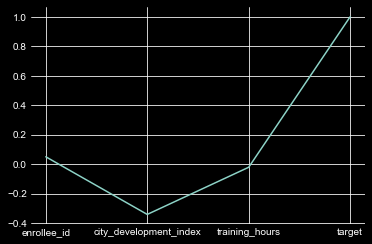

In [117]:
plt.plot(train_data.corr()['target'])

#### city_development_index는 강한 음의 상관성을 보임, 유의미한 Feature

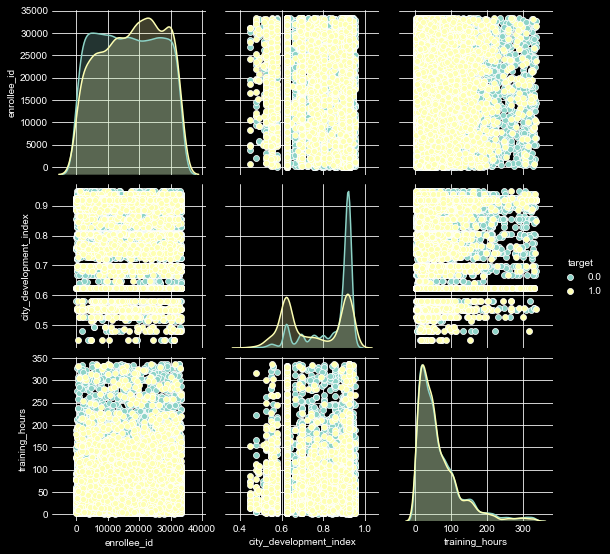

In [188]:
sns.pairplot(train_data, hue='target')

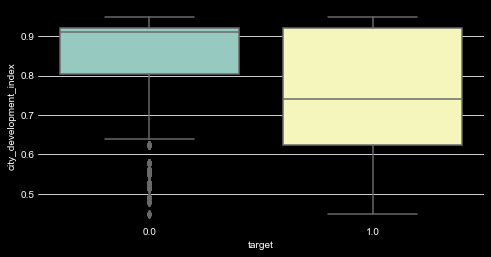

In [121]:
fig = plt.figure(figsize=(8,4))
sns.boxplot(x='target', y='city_development_index', data=train_data);

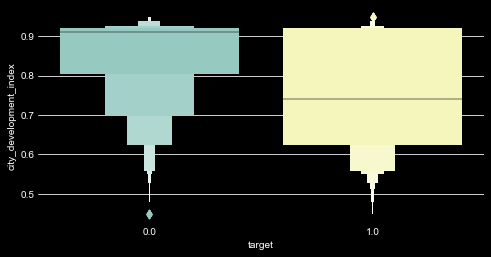

In [126]:
# boxenplot 
fig = plt.figure(figsize=(8,4))
sns.boxenplot(x='target', y='city_development_index', data=train_data);

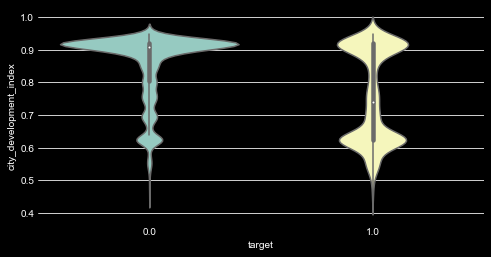

In [125]:
# viloin plot도 확인
fig = plt.figure(figsize=(8,4))
sns.violinplot(x='target', y='city_development_index', data=train_data);

더 발전된 도시에 있는 회사일 수록 이직률이 낮음.

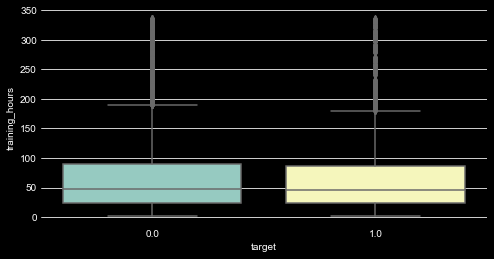

In [127]:
fig = plt.figure(figsize=(8,4))
sns.boxplot(x='target', y='training_hours', data=train_data);

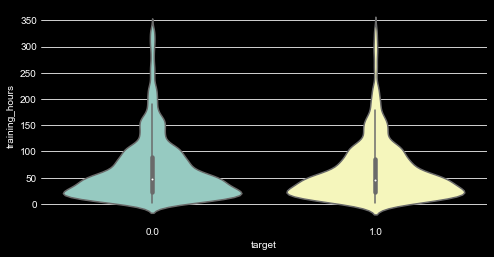

In [128]:
fig = plt.figure(figsize=(8,4))
sns.violinplot(x='target', y='training_hours', data=train_data);

heatmap을 통해 확인했지만, training_hours(재교육)는 이직률과 큰 상관성을 보이지 않음.

### Step 3-2. EDA - Visualization | Categorical Columns

In [70]:
train_data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


먼저, 기존에 숫자형 컬럼에서 상관성(음)이 높았던 city_development_index와 함께 보겠습니다.

In [133]:
cat_col

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

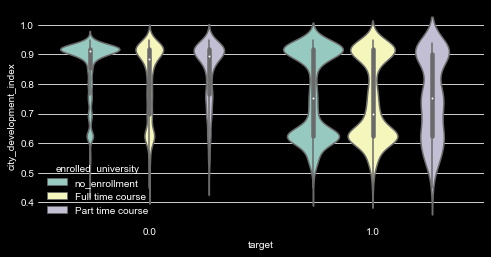

In [134]:
# enrolled_university
fig = plt.figure(figsize=(8,4))
sns.violinplot(x='target', y='city_development_index', data=train_data, hue='enrolled_university');

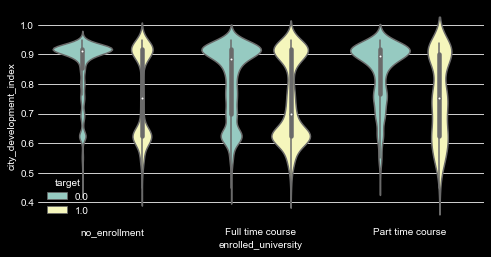

In [139]:
fig = plt.figure(figsize=(8,4))
sns.violinplot(x='enrolled_university', y='city_development_index', data=train_data, hue='target');

현재 방식이 적절하지 않은 것 같습니다. countplot으로 바꿔보겠습니다.

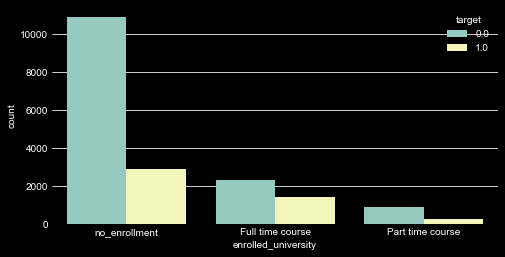

In [142]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='enrolled_university', data=train_data, hue='target');

겉보기에 고졸 학력자 이직률이 상대적으로 낮다는 것을 확인할 수 있습니다. 수치도 정확히 확인해보겠습니다.

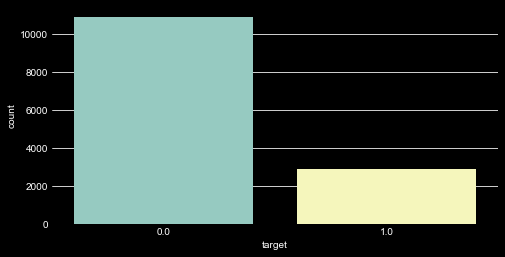

In [148]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='target', data=train_data[train_data['enrolled_university']=='no_enrollment']);

In [163]:
train_data[train_data['enrolled_university'] == 'no_enrollment'].describe()

,enrollee_id,city_development_index,training_hours,target
count,13817.000000,13817.000000,13817.000000,13817.000000
mean,16644.602229,0.842107,65.362018,0.211406
std,9674.592803,0.117346,59.617408,0.408321
min,1.000000,0.448000,1.000000,0.000000
25%,8230.000000,0.776000,23.000000,0.000000
50%,16662.000000,0.910000,48.000000,0.000000
75%,25049.000000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [165]:
train_data['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [168]:
train_data[train_data['enrolled_university'] == 'Full time course'].describe()

,enrollee_id,city_development_index,training_hours,target
count,3757.000000,3757.000000,3757.000000,3757.000000
mean,17387.229172,0.788633,64.532340,0.380889
std,9444.223894,0.134233,60.069682,0.485670
min,7.000000,0.448000,1.000000,0.000000
25%,9338.000000,0.624000,23.000000,0.000000
50%,17681.000000,0.843000,46.000000,0.000000
75%,25276.000000,0.920000,87.000000,1.000000
max,33370.000000,0.949000,336.000000,1.000000


In [167]:
train_data[train_data['enrolled_university'] == 'Part time course'].describe()

,enrollee_id,city_development_index,training_hours,target
count,1198.000000,1198.000000,1198.000000,1198.000000
mean,17628.087646,0.819777,67.571786,0.252087
std,9644.413270,0.120055,65.065184,0.434392
min,11.000000,0.448000,1.000000,0.000000
25%,9261.250000,0.743500,22.250000,0.000000
50%,17403.000000,0.887000,47.000000,0.000000
75%,26395.250000,0.920000,90.000000,1.000000
max,33349.000000,0.949000,336.000000,1.000000


In [178]:
# 고졸 학력자의 이직률이 가장 낮음, Full time > Part time > no_Enrollment 순으로 이직률이 높음
train_data[train_data['enrolled_university'] == 'no_enrollment'].describe()['target']['mean']

0.21140623869146705

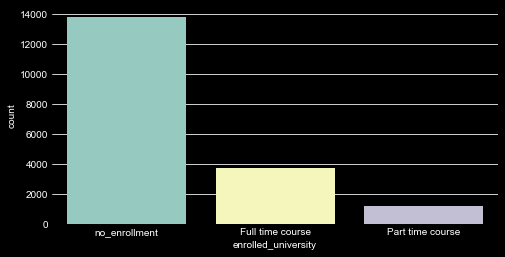

In [145]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='enrolled_university', data=train_data);

In [143]:
cat_col

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

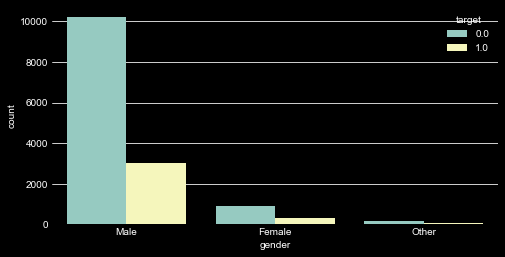

In [144]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='gender', data=train_data, hue='target');

남성 비중이 너무 크기 때문에 대조 부적절

In [137]:
cat_col

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

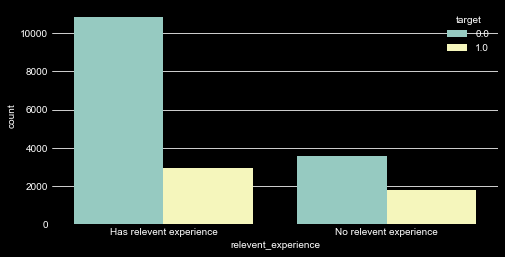

In [179]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='relevent_experience', data=train_data, hue='target');

이력서에 본 직무의 유관 경험이 있는 경우, 이직률이 낮음(전문성이 높을 수록 이직률은 낮은 것으로 보임)

In [180]:
train_data['education_level'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

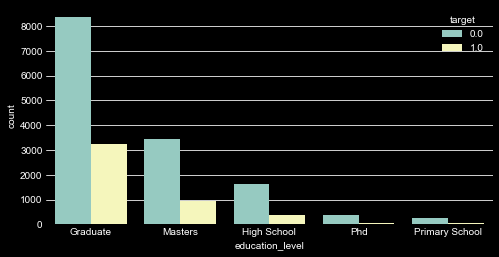

In [181]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='education_level', data=train_data, hue='target');

In [189]:
train_data[train_data['education_level'] == 'Graduate'].describe()

,enrollee_id,city_development_index,training_hours,target
count,11598.000000,11598.000000,11598.000000,11598.000000
mean,17042.915330,0.823731,65.773409,0.279790
std,9739.115384,0.127304,60.522653,0.448915
min,8.000000,0.448000,1.000000,0.000000
25%,8575.250000,0.698000,23.000000,0.000000
50%,17231.500000,0.910000,47.000000,0.000000
75%,25691.750000,0.920000,89.000000,1.000000
max,33380.000000,0.949000,336.000000,1.000000


In [196]:
train_data['education_level'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [197]:
levels = list(train_data['education_level'].unique())

In [198]:
for level in levels:
    print(level, " --> ", train_data[train_data['education_level'] == level]['target'].mean())

Graduate  -->  0.2797896188998103
Masters  -->  0.21440036688832836
High School  -->  0.19533961328705998
nan  -->  nan
Phd  -->  0.14009661835748793
Primary School  -->  0.1331168831168831


[이직률]
- 초졸 : 13%
- 고졸 : 19%
- 대졸 : 27%
- 석사 : 21%
- 박사 : 14%

교육수준이 아주 낮거나 아주 높은 경우보다 일반 대졸자가 이직률이 높음.
직업 선택에 대해 고민하는 비중이 높은 것으로 보임. but 대졸자가 차지하는 %가 가장 높기 때문에 참고지표로만 활용.

In [199]:
cat_col

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

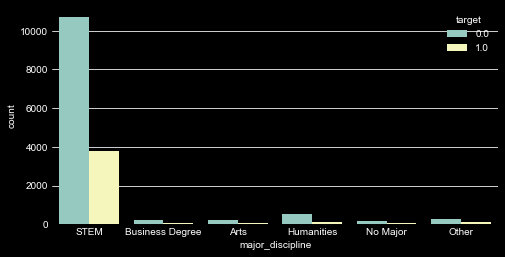

In [200]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='major_discipline', data=train_data, hue='target');

In [202]:
majors = list(train_data['major_discipline'].unique())

In [205]:
for major in majors:
    print(major, " --> ", train_data[train_data['major_discipline'] == major]['target'].mean())

STEM  -->  0.2615926028153464
Business Degree  -->  0.26299694189602446
nan  -->  nan
Arts  -->  0.20948616600790515
Humanities  -->  0.21076233183856502
No Major  -->  0.24663677130044842
Other  -->  0.2677165354330709


전공에 따라 이직률에 큰 차이를 보이지는 않음

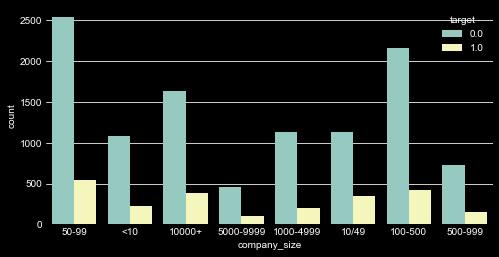

In [206]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='company_size', data=train_data, hue='target');

In [207]:
sizes = list(train_data['company_size'].unique())

In [208]:
for size in sizes:
    print(size, " --> ", train_data[train_data['company_size'] == size]['target'].mean())

nan  -->  nan
50-99  -->  0.1767758676613688
<10  -->  0.1712538226299694
10000+  -->  0.1906884596334819
5000-9999  -->  0.1811722912966252
1000-4999  -->  0.15060240963855423
10/49  -->  0.23385452073419444
100-500  -->  0.161415791520809
500-999  -->  0.1733181299885975


회사 규모도 이직률에 큰 영향을 주지 못함.

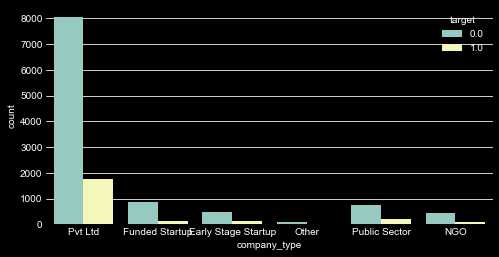

In [209]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='company_type', data=train_data, hue='target');

In [210]:
types = list(train_data['company_type'].unique())

In [211]:
for type_one in types:
    print(type_one, " --> ", train_data[train_data['company_type'] == type_one]['target'].mean())

nan  -->  nan
Pvt Ltd  -->  0.18080880105938676
Funded Startup  -->  0.13986013986013987
Early Stage Startup  -->  0.23548922056384744
Other  -->  0.2396694214876033
Public Sector  -->  0.2198952879581152
NGO  -->  0.18618042226487524


초기 시타트업의 경우 가장 이직률이 높고, 펀딩 받은 스타트업은 이직률이 낮음. 마찬가지 참고지표로만.

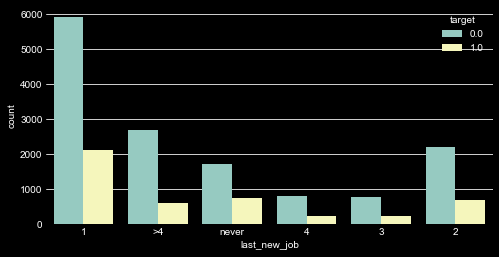

In [213]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='last_new_job', data=train_data, hue='target');

In [214]:
years = list(train_data['last_new_job'].unique())
for year in years:
    print(year, " --> ", train_data[train_data['last_new_job'] == year]['target'].mean())

1  -->  0.26430348258706465
>4  -->  0.182370820668693
never  -->  0.30138662316476345
4  -->  0.22157434402332363
3  -->  0.2255859375
2  -->  0.2413793103448276
nan  -->  nan


이전 직장 근속 년수가 아주 높으면(4년이상) 이직률이 낮고, 직장 경험이 없으면(첫직장이라면) 이직률이 높음.

In [215]:
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
